In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import subprocess

In [3]:
output = subprocess.check_output("grep \'^ 200\' ../experiments/logs/training_logs", shell=True).decode("utf-8") 

In [4]:
output_log = np.array([[float(i) for i in o.split()] for o in output.split('\n')[:-1]])

In [5]:
output_gt16 = subprocess.check_output("grep \'^ 200\' ../experiments/logs/training_logs_gt16", shell=True).decode("utf-8")
output_gt16_log = np.array([[float(i) for i in o.split()] for o in output_gt16.split('\n')[:-1]])

Text(0, 0.5, 'Loss')

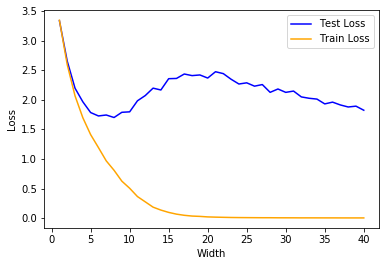

In [6]:
plt.plot(range(1, 41), np.concatenate((output_log[:,4], output_gt16_log[:,4])), 
         label = 'Test Loss', color = 'blue')
plt.plot(range(1, 41), np.concatenate((output_log[:,2], output_gt16_log[:,2])), 
         label = 'Train Loss', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

plt.legend()
plt.xlabel('Width')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

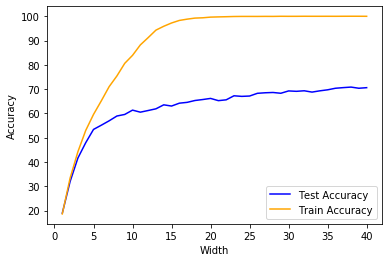

In [7]:
plt.plot(range(1, 41), np.concatenate((output_log[:,5], output_gt16_log[:,5])), 
         label = 'Test Accuracy', color = 'blue')
plt.plot(range(1, 41), np.concatenate((output_log[:,3], output_gt16_log[:,3])), 
         label = 'Train Accuracy', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

plt.legend()
plt.xlabel('Width')
plt.ylabel('Accuracy')

In [8]:
all_evals = []
for i in range(1, 41):
    current = np.load('../experiments/all_eigs/width_'+str(i)+'.npz')
    all_evals.append(current['pos_evals'])

In [9]:
def eff_dim(vec, s=1):
    return np.sum(vec / (vec + s))

In [10]:
eff_dim_list = np.array([eff_dim(v, s = 10.) for v in all_evals])

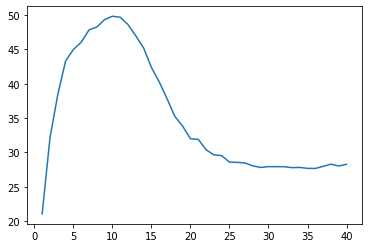

In [11]:
plt.plot(range(1, 41), eff_dim_list)
#plt.plot(range(30, 38), [1./eff_dim(v, s=10.) for v in all_evals_gt30])

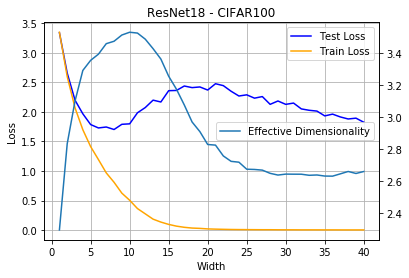

In [16]:
fig, ax = plt.subplots()
ax.plot(range(1, 41), np.concatenate((output_log[:,4], output_gt16_log[:,4])), 
         label = 'Test Loss', color = 'blue')
ax.plot(range(1, 41), np.concatenate((output_log[:,2], output_gt16_log[:,2])), 
         label = 'Train Loss', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

ax.legend()
ax.set_xlabel('Width')
ax.set_ylabel('Loss')

ax2 = ax.twinx()
ax2.plot(range(1, 41), eff_dim_list, label = 'Effective Dimensionality')
ax2.legend(loc='right')

plt.title('ResNet18 - CIFAR100')
ax.grid()